<center><h1><bold>ASSIGNMENT 4 (SENTIMENT ANALYSIS)</bold></h1></center>

In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
data = pd.read_pickle('data_clean.pkl')
data

,transcript
all-about-my-mother-1999,mother transcript scraps loft skip content sea...
babygirl,babygirl transcript scraps loft skip content s...
den-of-thieves-2-pantera,den thieves pantera transcript scraps loft ski...
moana-2,moana transcript scraps loft skip content sear...
sonic-the-hedgehog-3,sonic hedgehog transcript scraps loft skip con...
star-trek-section-31,star trek section transcript scraps loft skip ...


In [7]:
full_names = ['all about my mother','babygirl','den of thieves 2','moana 2','sonic the hedgehog 3','star trek section']

data['full_name'] = full_names
data

,transcript,full_name
all-about-my-mother-1999,mother transcript scraps loft skip content sea...,all about my mother
babygirl,babygirl transcript scraps loft skip content s...,babygirl
den-of-thieves-2-pantera,den thieves pantera transcript scraps loft ski...,den of thieves 2
moana-2,moana transcript scraps loft skip content sear...,moana 2
sonic-the-hedgehog-3,sonic hedgehog transcript scraps loft skip con...,sonic the hedgehog 3
star-trek-section-31,star trek section transcript scraps loft skip ...,star trek section


# Sentiment of Routine

In [9]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
all-about-my-mother-1999,mother transcript scraps loft skip content sea...,all about my mother,-0.013107,0.516345
babygirl,babygirl transcript scraps loft skip content s...,babygirl,0.134467,0.573466
den-of-thieves-2-pantera,den thieves pantera transcript scraps loft ski...,den of thieves 2,0.019322,0.441222
moana-2,moana transcript scraps loft skip content sear...,moana 2,0.099964,0.525734
sonic-the-hedgehog-3,sonic hedgehog transcript scraps loft skip con...,sonic the hedgehog 3,0.077299,0.550872
star-trek-section-31,star trek section transcript scraps loft skip ...,star trek section,0.083187,0.502224


C:\Users\gauta\AppData\Local\Temp\ipykernel_14928\2611889279.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)


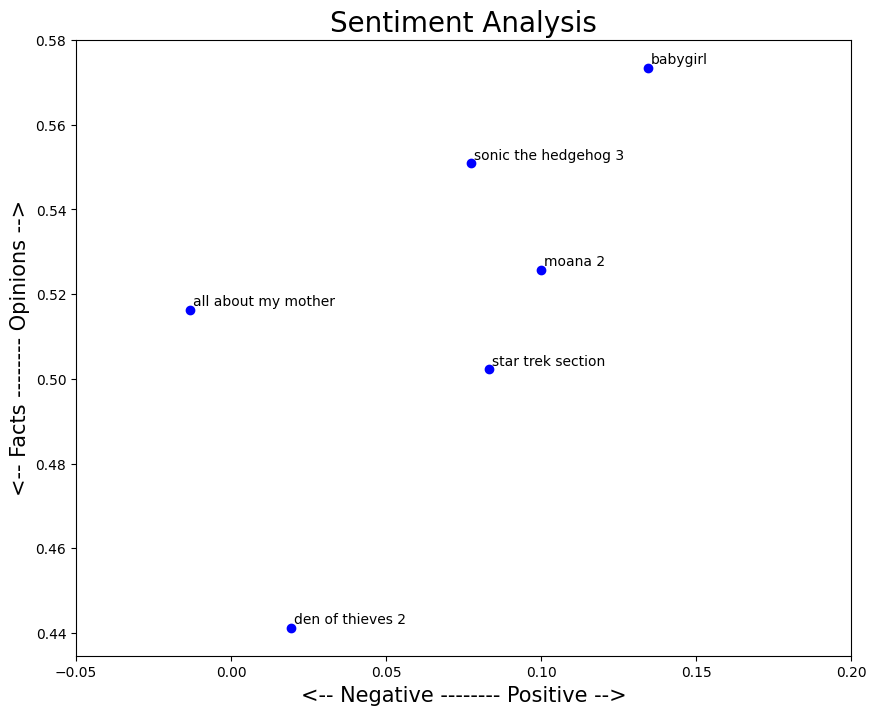

In [13]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.05, .20) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## FINDINGS

1. all about my mother can be serious, tragic or horror genre as these genre always have negative sentiment
2. den of thieves 2 is most factual movie can be documentary or history based

# Sentiment of Routine Over Time

In [11]:
def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [13]:
data

,transcript,full_name,polarity,subjectivity
all-about-my-mother-1999,mother transcript scraps loft skip content sea...,all about my mother,-0.013107,0.516345
babygirl,babygirl transcript scraps loft skip content s...,babygirl,0.134467,0.573466
den-of-thieves-2-pantera,den thieves pantera transcript scraps loft ski...,den of thieves 2,0.019322,0.441222
moana-2,moana transcript scraps loft skip content sear...,moana 2,0.099964,0.525734
sonic-the-hedgehog-3,sonic hedgehog transcript scraps loft skip con...,sonic the hedgehog 3,0.077299,0.550872
star-trek-section-31,star trek section transcript scraps loft skip ...,star trek section,0.083187,0.502224


In [15]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['mother transcript scraps loft skip content search movies movie reviews movie transcripts tv series tv show transcripts comedy standup comedy transcripts george carlin dave chappelle interviews playboy interviews music history books opinions movies movie reviews movie transcripts tv series tv show transcripts comedy standup comedy transcripts george carlin dave chappelle interviews playboy interviews music history books opinions movies mother transcript january comedydrama bereaved mother overwrought actress jealous lover pregnant nun mother original title todo sobre mi madre genre comedy art house lgbtq drama director pedro almodóvar writers pedro almodóvar stars cecilia roth marisa paredes candela peña penélope cruz antonia san juan synopsis argentine manuela echevarria organ transplant coordinator madrid hospital ran husband barcelona eighteen years ago upon learning pregnant never told son esteban aspiring writer father despite curiosity event coinciding esteban turning seventeen

In [17]:
len(list_pieces)

6

In [19]:
len(list_pieces[0])

10

In [21]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.010978249392883534,
  0.023702118588482222,
  0.016874307862679964,
  -0.06274018379281539,
  -0.053370962370962394,
  -0.05900773609106943,
  0.11343694885361552,
  -0.08999528697109346,
  0.004106023287057759,
  0.019690593094848424],
 [0.07280533673976297,
  0.23923404552436808,
  0.11342407592407595,
  0.18460884353741494,
  0.21641865079365075,
  0.15944107744107738,
  0.06043586789554532,
  0.15598739495798317,
  0.07376322751322752,
  0.04826388888888891],
 [-0.06565255731922398,
  0.12146150038591898,
  0.07358686067019399,
  0.0595035173160173,
  -0.09316124908230176,
  0.0819642857142857,
  0.062034632034632047,
  -0.0721377580752581,
  0.026376612517916863,
  0.020378637566137572],
 [0.16458803877282135,
  0.015819964349376124,
  0.08624564093314094,
  0.24522907647907644,
  0.16861849390919156,
  0.021395169870779624,
  0.15264249639249636,
  0.15187268089053801,
  0.007142857142857146,
  0.03340121999212908],
 [-0.026784511784511786,
  0.21945599445599445,
  0.0410192

In [29]:
polarity_transcript[0]

[-0.010978249392883534,
 0.023702118588482222,
 0.016874307862679964,
 -0.06274018379281539,
 -0.053370962370962394,
 -0.05900773609106943,
 0.11343694885361552,
 -0.08999528697109346,
 0.004106023287057759,
 0.019690593094848424]

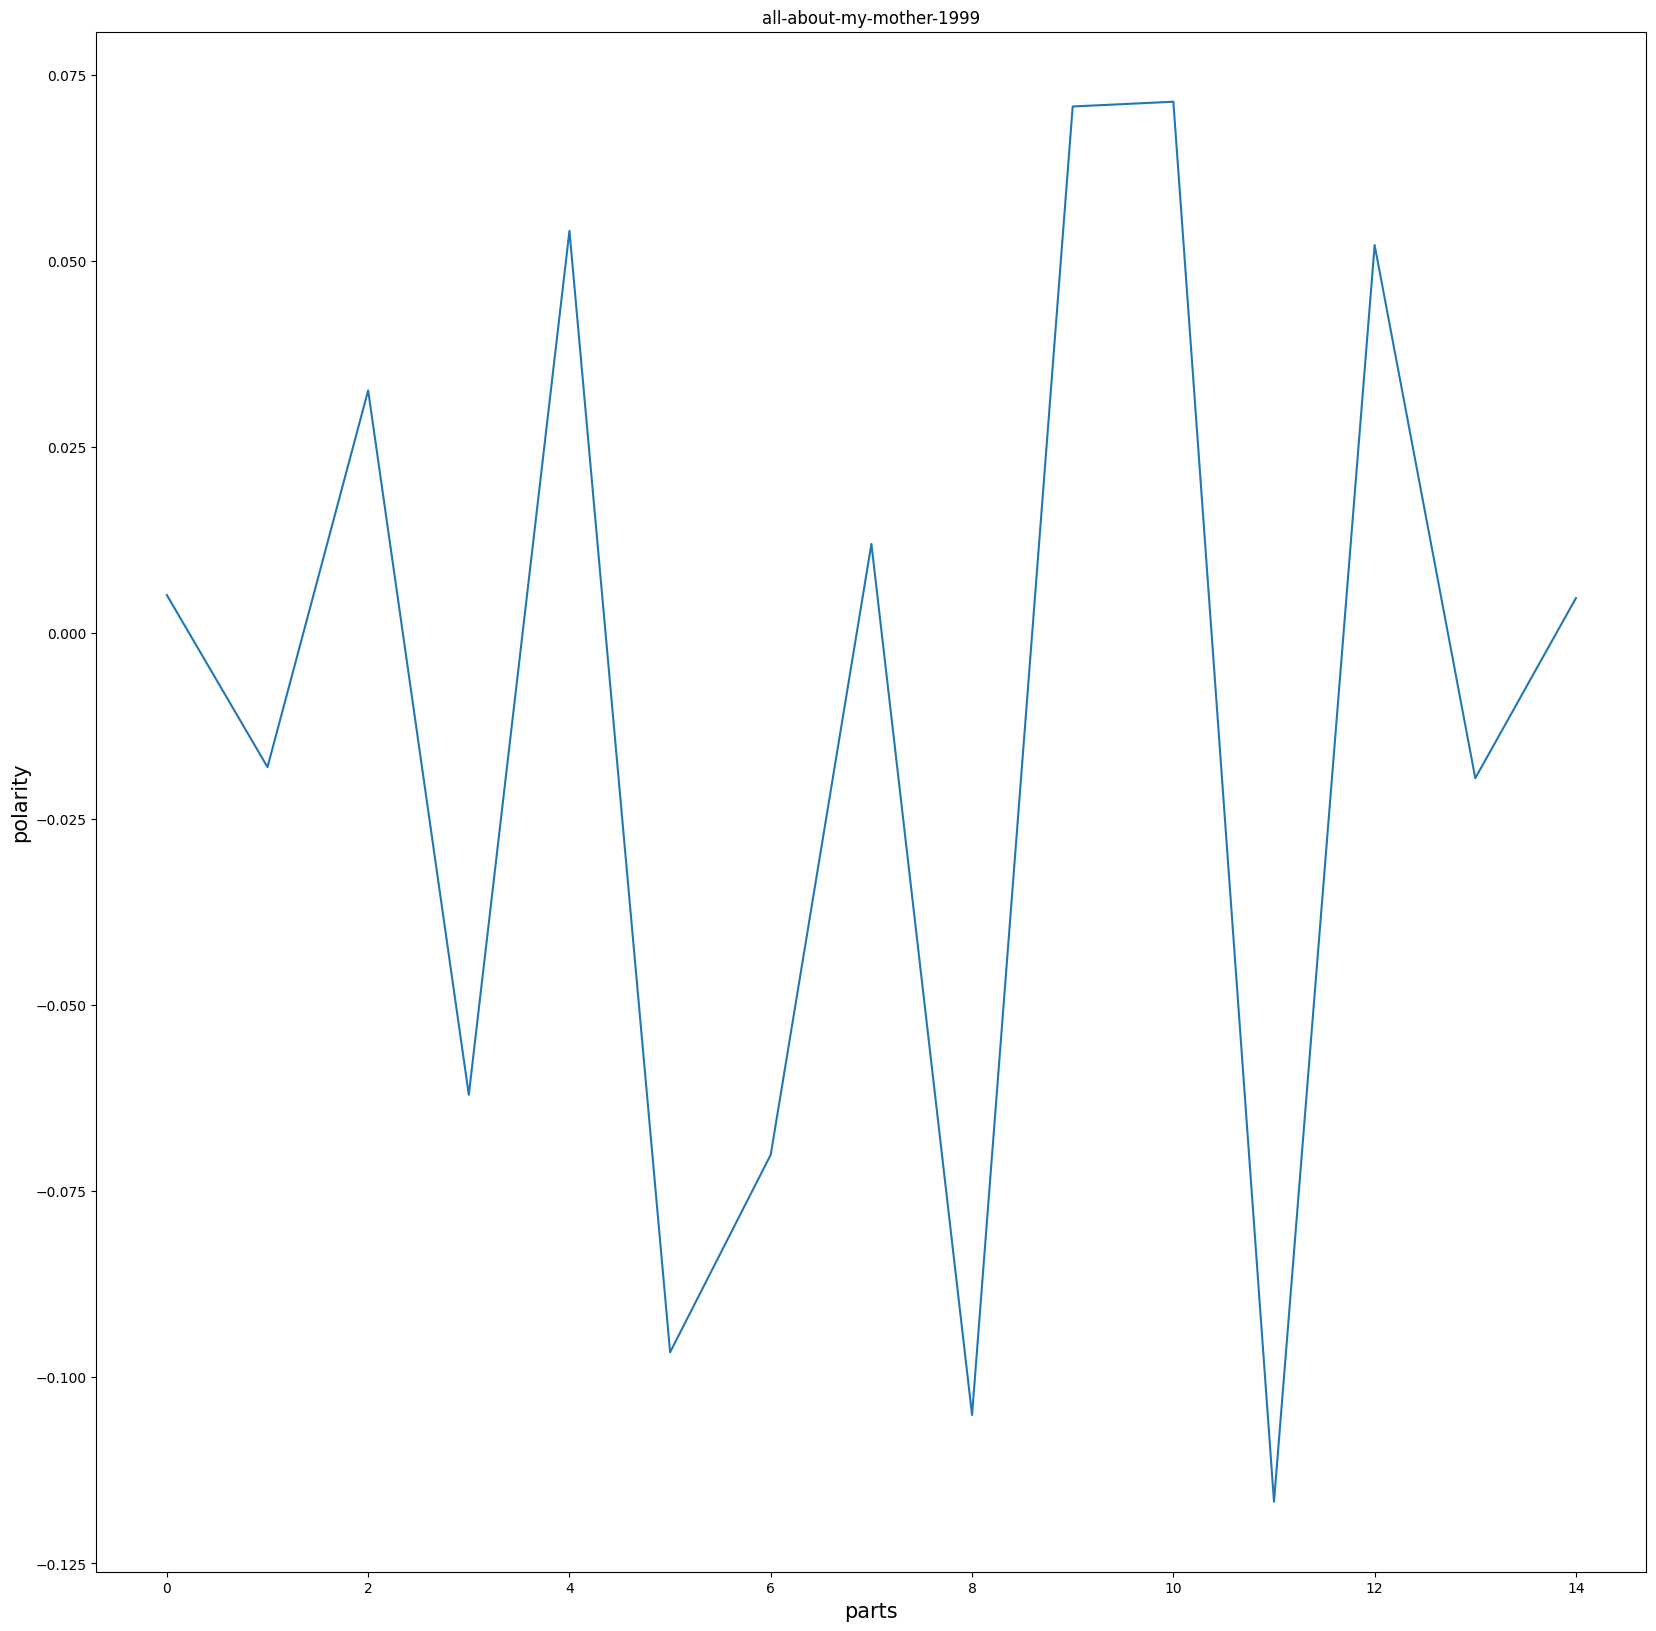

In [65]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.xlabel('parts', fontsize=15)
plt.ylabel('polarity', fontsize=15)
plt.show()

C:\Users\gauta\AppData\Local\Temp\ipykernel_18672\1567996614.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


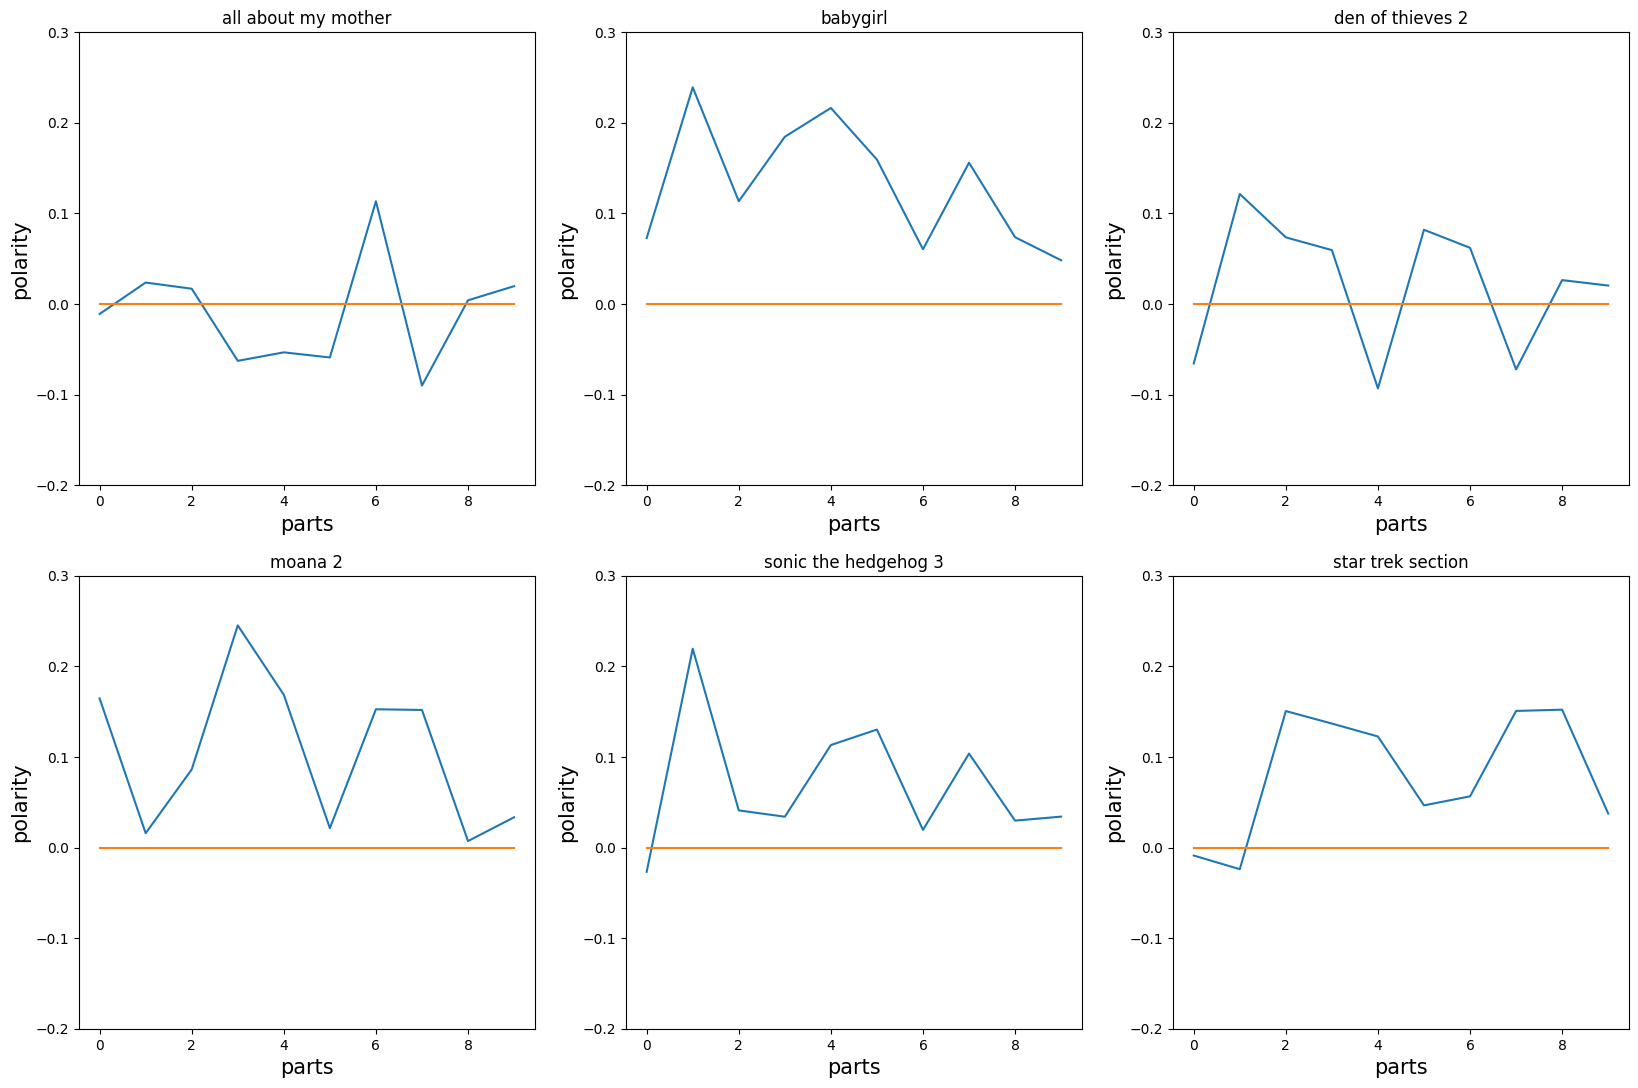

In [45]:
plt.rcParams['figure.figsize'] = [20, 20]

for index, movie in enumerate(data.index):    
    plt.subplot(3, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.xlabel('parts', fontsize=15)
    plt.ylabel('polarity', fontsize=15)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

# Additional Exercises 

In [55]:
def split_text1(text, n=15):
    '''Takes in a string of text and splits into n equal parts, with a default of 15 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [87]:
list_pieces = []
for t in data.transcript:
    split = split_text1(t)
    list_pieces.append(split)
    
list_pieces

[['mother transcript scraps loft skip content search movies movie reviews movie transcripts tv series tv show transcripts comedy standup comedy transcripts george carlin dave chappelle interviews playboy interviews music history books opinions movies movie reviews movie transcripts tv series tv show transcripts comedy standup comedy transcripts george carlin dave chappelle interviews playboy interviews music history books opinions movies mother transcript january comedydrama bereaved mother overwrought actress jealous lover pregnant nun mother original title todo sobre mi madre genre comedy art house lgbtq drama director pedro almodóvar writers pedro almodóvar stars cecilia roth marisa paredes candela peña penélope cruz antonia san juan synopsis argentine manuela echevarria organ transplant coordinator madrid hospital ran husband barcelona eighteen years ago upon learning pregnant never told son esteban aspiring writer father despite curiosity event coinciding esteban turning seventeen

In [89]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.005132148553201188,
  -0.017989417989417986,
  0.032634114251761305,
  -0.06201499118165784,
  0.05407509157509159,
  -0.09662114845938374,
  -0.07007142857142859,
  0.012004947433518863,
  -0.1050627069009422,
  0.0707897793263647,
  0.07143016297428059,
  -0.11671022067363532,
  0.052166005291005284,
  -0.019475485754555526,
  0.0047337278106508885],
 [-0.004444444444444444,
  0.2721849665486029,
  0.13072423072423076,
  0.09352106227106227,
  0.11555435305435305,
  0.2345610119047619,
  0.25347011144883475,
  0.17460016835016834,
  0.13935231435231438,
  0.03185157041540021,
  0.17553763440860215,
  0.1426053113553114,
  0.09675925925925927,
  0.08465608465608465,
  -0.024193548387096777],
 [-0.09343434343434343,
  0.0649702380952381,
  0.11022350369365297,
  0.05621693121693121,
  0.14260246387112055,
  -0.005706075533661732,
  -0.05230380396043049,
  -0.13764880952380956,
  0.13832142857142857,
  0.1283293650793651,
  -0.08387681159420292,
  -0.04423189423189423,
  -0.04676216

C:\Users\gauta\AppData\Local\Temp\ipykernel_18672\2046666454.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


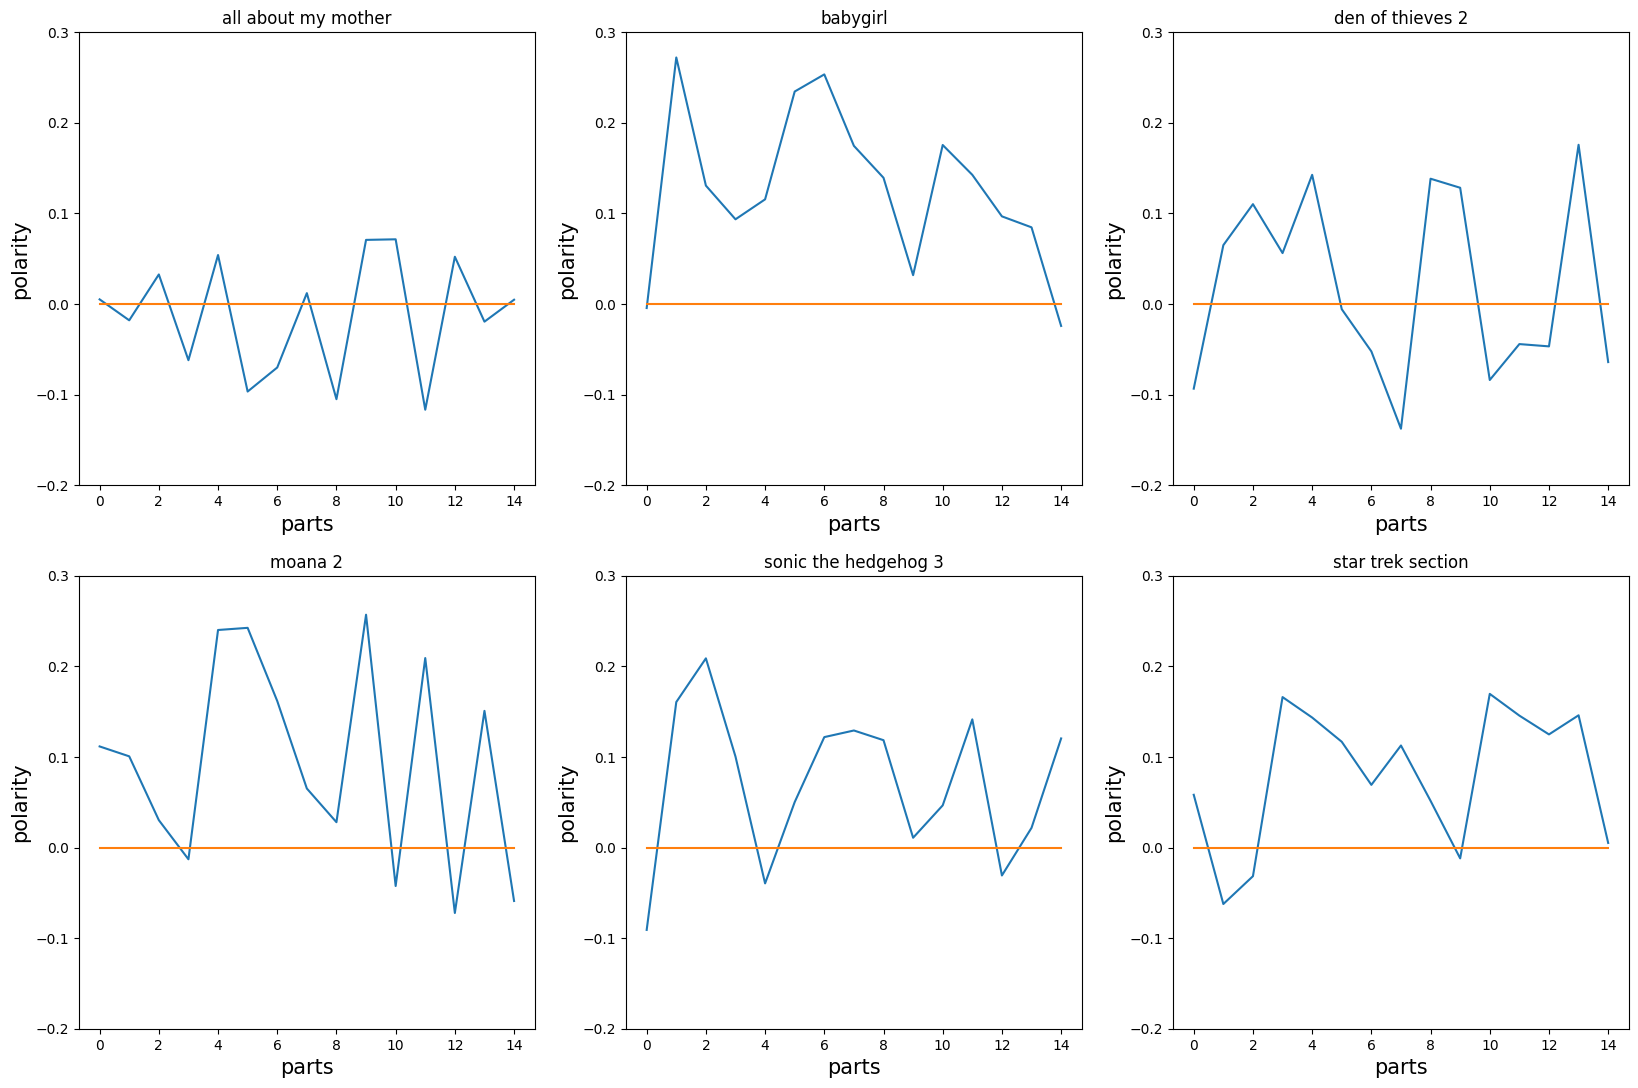

In [97]:
plt.rcParams['figure.figsize'] = [20, 20]

for index, movie in enumerate(data.index):    
    plt.subplot(3, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(data['full_name'][index])
    plt.xlabel('parts', fontsize=15)
    plt.ylabel('polarity', fontsize=15)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

## FINDINGS

1. **babygirl & moana2** movie in 10 part split was throughout positive but when it splits into 15 parts the last parts seems to be negative

In [99]:
def split_text2(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 15 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [101]:
list_pieces = []
for t in data.transcript:
    split = split_text2(t)
    list_pieces.append(split)
    
list_pieces

[['mother transcript scraps loft skip content search movies movie reviews movie transcripts tv series tv show transcripts comedy standup comedy transcripts george carlin dave chappelle interviews playboy interviews music history books opinions movies movie reviews movie transcripts tv series tv show transcripts comedy standup comedy transcripts george carlin dave chappelle interviews playboy interviews music history books opinions movies mother transcript january comedydrama bereaved mother overwrought actress jealous lover pregnant nun mother original title todo sobre mi madre genre comedy art house lgbtq drama director pedro almodóvar writers pedro almodóvar stars cecilia roth marisa paredes candela peña penélope cruz antonia san juan synopsis argentine manuela echevarria organ transplant coordinator madrid hospital ran husband barcelona eighteen years ago upon learning pregnant never told son esteban aspiring writer father despite curiosity event coinciding esteban turning seventeen

In [103]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.009166666666666672,
  -0.0013924963924963859,
  -0.049999999999999996,
  0.05349659206042183,
  -0.1813392857142857,
  0.1892339544513458,
  -0.03546176046176047,
  -0.1002480158730159,
  -0.11321428571428574,
  0.04237835497835498,
  0.011607142857142858,
  -0.16172028728846913,
  0.026105442176870736,
  0.18128306878306877,
  -0.08706545979273254,
  -0.09332922824302134,
  0.04430272108843537,
  -0.03283885654575309,
  0.09584859584859583,
  -0.1111111111111111],
 [0.039473684210526314,
  0.08788394145537001,
  0.3618290043290044,
  0.09972943722943724,
  0.04714839424141749,
  0.19484848484848483,
  0.11085600907029478,
  0.27311224489795916,
  0.270267857142857,
  0.12165898617511524,
  0.21443001443001442,
  0.11851907782140342,
  0.0057110682110682156,
  0.14142857142857143,
  0.26041666666666663,
  0.08288690476190474,
  0.1177645502645503,
  0.02976190476190476,
  0.08924731182795702,
  -0.026470588235294107],
 [-0.14012345679012345,
  0.008818342151675493,
  0.035068027210

C:\Users\gauta\AppData\Local\Temp\ipykernel_18672\3365100936.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


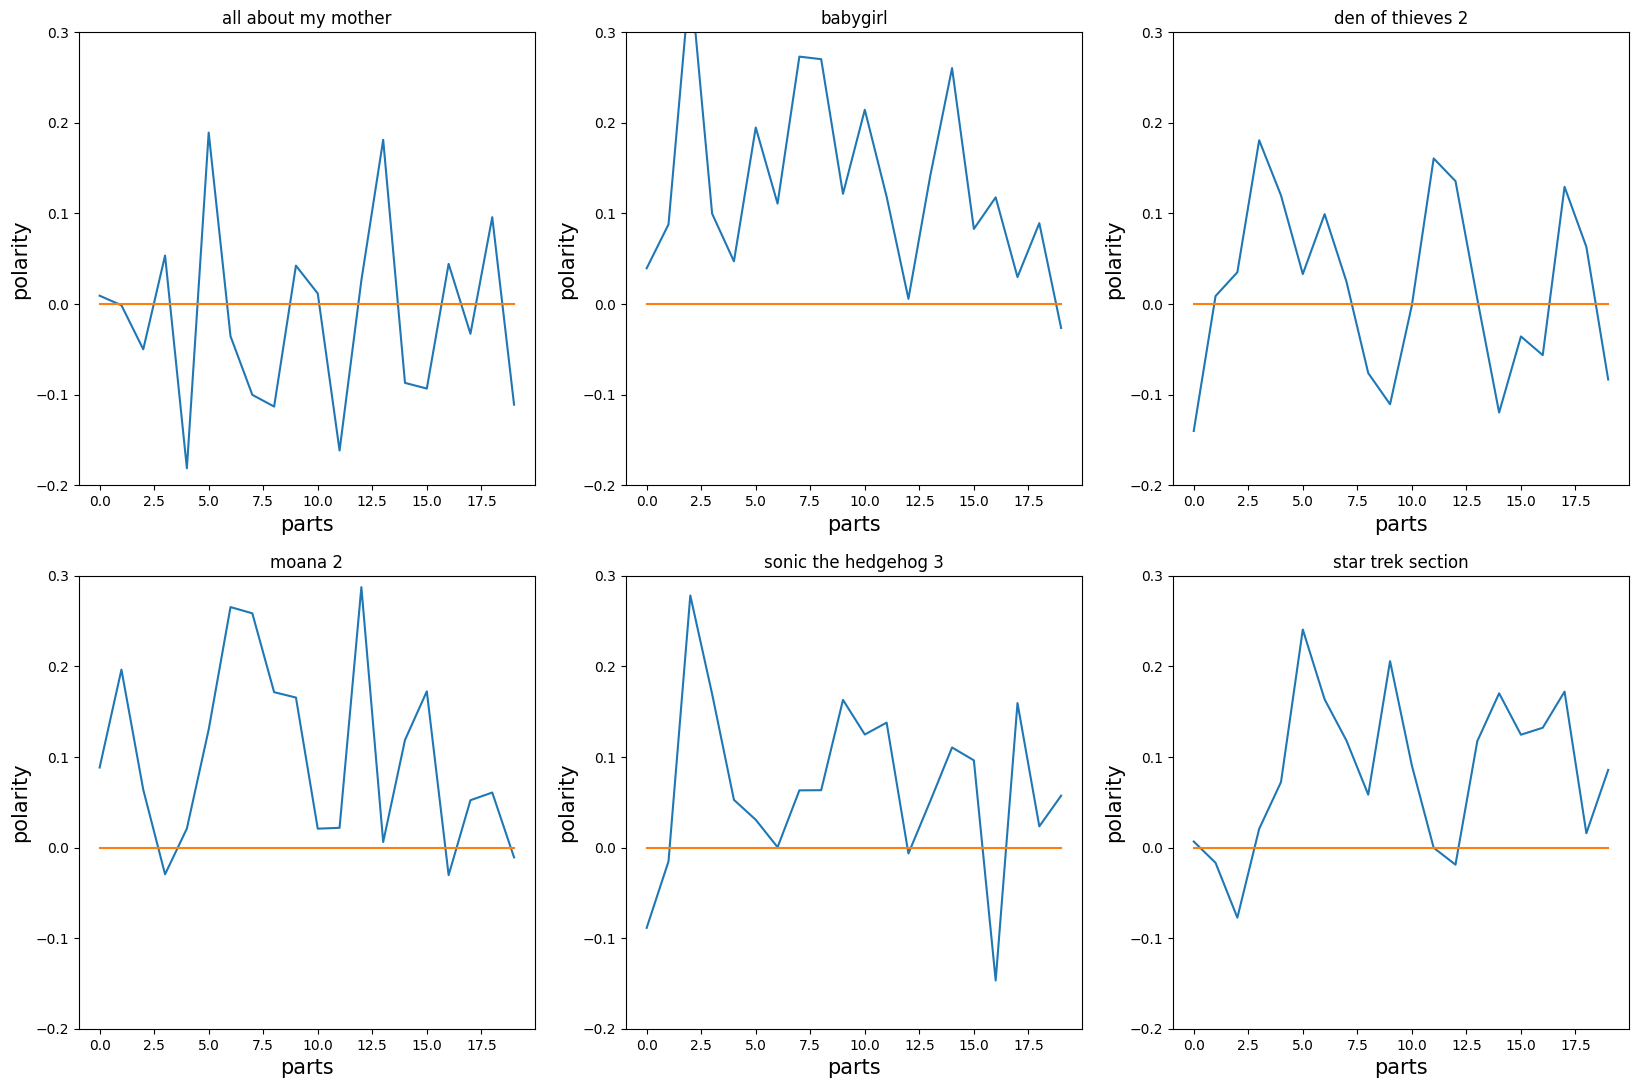

In [105]:
plt.rcParams['figure.figsize'] = [20,20]

for index, movie in enumerate(data.index):    
    plt.subplot(3, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['full_name'][index])
    plt.xlabel('parts', fontsize=15)
    plt.ylabel('polarity', fontsize=15)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [49]:
subjectivity_transcript = []

for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

subjectivity_transcript

[[0.46805650489861006,
  0.4963624338624339,
  0.5179077186430128,
  0.5358245149911816,
  0.49043549043549034,
  0.6765814659197011,
  0.5151190476190477,
  0.5092040816326532,
  0.5277374586198116,
  0.47979094076655043,
  0.5234355105678635,
  0.5704558652729386,
  0.4637400793650793,
  0.46725225678714055,
  0.49689349112426034],
 [0.5516666666666665,
  0.6618672438672437,
  0.4951795951795949,
  0.50254884004884,
  0.4900753567420234,
  0.5601727843915343,
  0.6775835866261398,
  0.6529468795093795,
  0.5308878621378624,
  0.598518237082067,
  0.5911290322580645,
  0.6119963369963369,
  0.5241307634164779,
  0.5546560846560845,
  0.596774193548387],
 [0.42727272727272725,
  0.38955357142857144,
  0.48268155973379867,
  0.4620811287477956,
  0.4134150675195452,
  0.4662458949096879,
  0.49695665780003145,
  0.5131524725274724,
  0.547154761904762,
  0.4331719576719577,
  0.3292874396135267,
  0.4030858780858782,
  0.49068288854003167,
  0.3676623376623377,
  0.36025641025641025],
 

C:\Users\gauta\AppData\Local\Temp\ipykernel_18672\2940930285.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


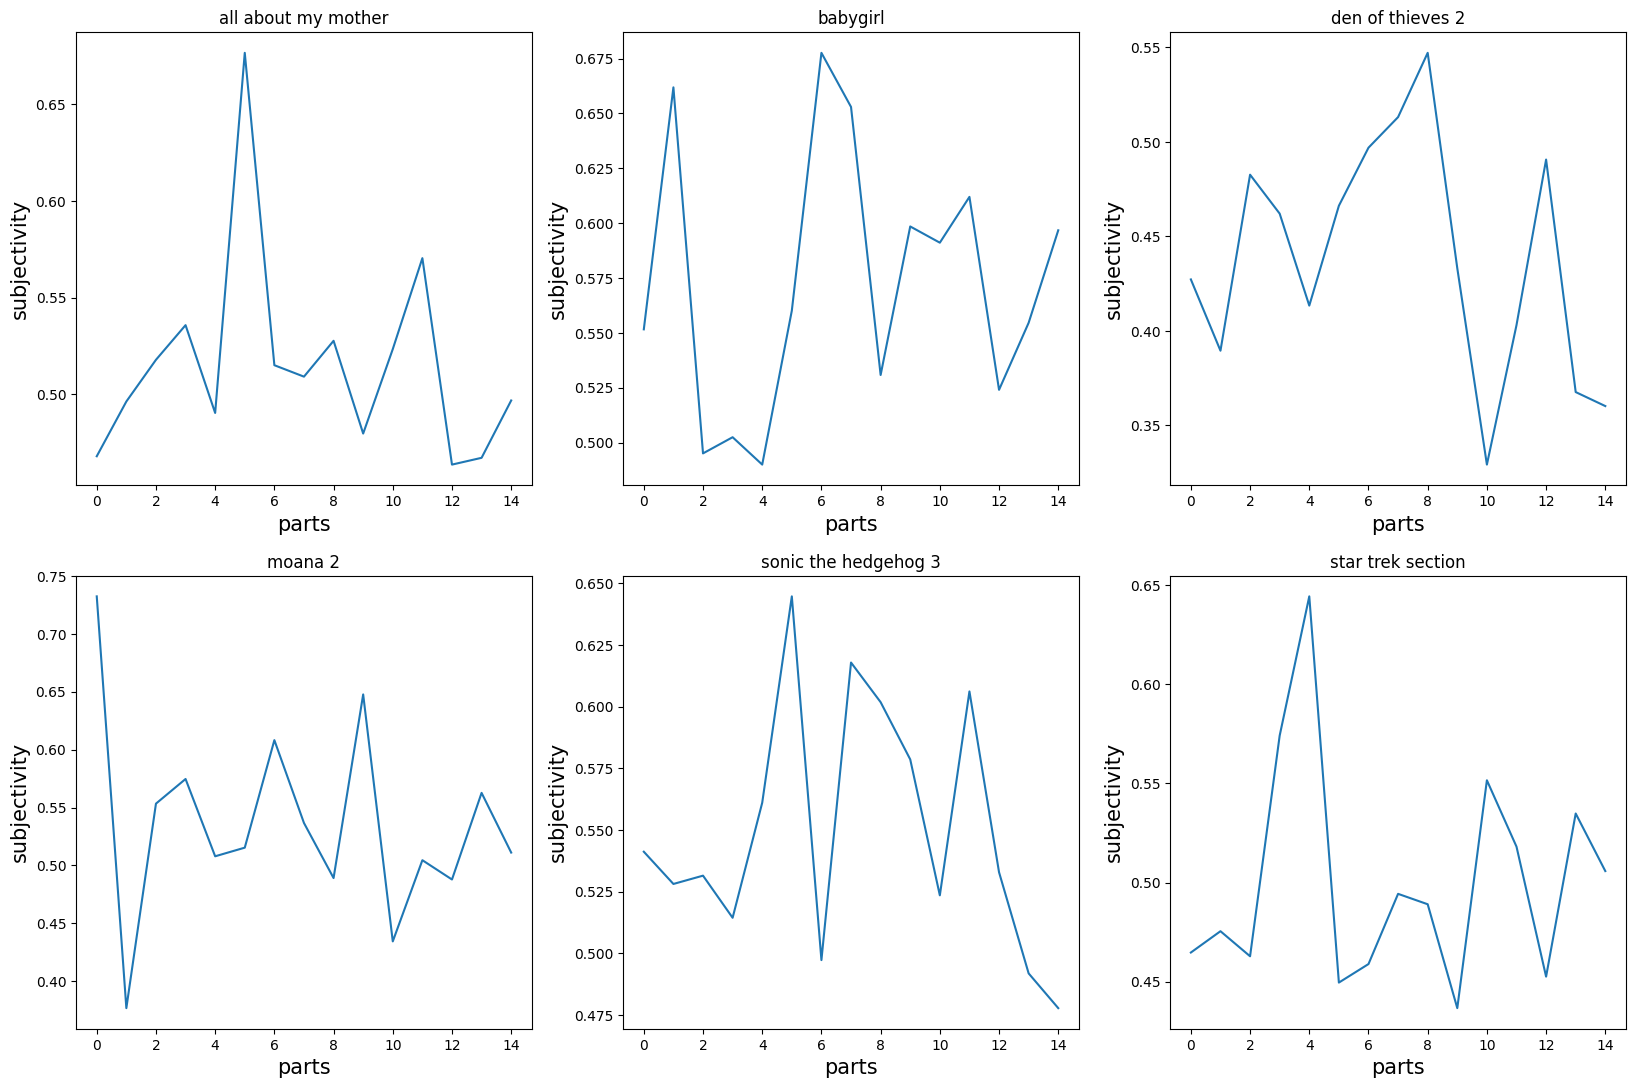

In [69]:
plt.rcParams['figure.figsize'] = [20,20]

for index, movie in enumerate(data.index):    
    plt.subplot(3, 3, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.title(data['full_name'][index])
    plt.xlabel('parts', fontsize=15)
    plt.ylabel('subjectivity', fontsize=15)
    
plt.show()

## FINDINGS

1. **all about my mother & star trak section** movie remains most of times factual